## 1. Veri Setini Yükleme ve Anlama

In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd
import re
import numpy as np
import time
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
def getAndParseURL(url):
    result = requests.get(url, headers={"User-Agent":"Chrome/103.0.0.0"})
    soup = bts(result.text, "html.parser")
    return soup

In [3]:
pages = ["https://www.hepsiburada.com/ara?q=robot%20s%C3%BCp%C3%BCrge"]
for page in range(2,50):
    pages.append("https://www.hepsiburada.com/ara?q=buzdolab%C4%B1&sayfa="+str(page))
print(pages[:14])

['https://www.hepsiburada.com/ara?q=robot%20s%C3%BCp%C3%BCrge', 'https://www.hepsiburada.com/ara?q=buzdolab%C4%B1&sayfa=2', 'https://www.hepsiburada.com/ara?q=buzdolab%C4%B1&sayfa=3', 'https://www.hepsiburada.com/ara?q=buzdolab%C4%B1&sayfa=4', 'https://www.hepsiburada.com/ara?q=buzdolab%C4%B1&sayfa=5', 'https://www.hepsiburada.com/ara?q=buzdolab%C4%B1&sayfa=6', 'https://www.hepsiburada.com/ara?q=buzdolab%C4%B1&sayfa=7', 'https://www.hepsiburada.com/ara?q=buzdolab%C4%B1&sayfa=8', 'https://www.hepsiburada.com/ara?q=buzdolab%C4%B1&sayfa=9', 'https://www.hepsiburada.com/ara?q=buzdolab%C4%B1&sayfa=10', 'https://www.hepsiburada.com/ara?q=buzdolab%C4%B1&sayfa=11', 'https://www.hepsiburada.com/ara?q=buzdolab%C4%B1&sayfa=12', 'https://www.hepsiburada.com/ara?q=buzdolab%C4%B1&sayfa=13', 'https://www.hepsiburada.com/ara?q=buzdolab%C4%B1&sayfa=14']


In [5]:
len(pages)

49

In [4]:
products = []
for page in pages:
    html = getAndParseURL(page)
    for product in html.findAll("li",{"class":"productListContent-item"}):
        products.append("https://www.hepsiburada.com" + product.a.get("href"))
print(products[:25])

['https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ', 'https://www.hepsiburada.com/xiaomi-mi-vacuum-mop-1c-2-in-1-robot-supurge-p-HBV00000PM13D', 'https://www.hepsiburada.com/roborock-s7-sonic-mopping-akilli-robot-supurge-s7-beyaz-p-HBCV00000C10BN', 'https://www.hepsiburada.com/roborock-s5-max-vacuum-cleaner-beyaz-akilli-robot-supurge-ve-paspas-p-HBV00000Q7FBL', 'https://www.hepsiburada.com/tefal-rg7675-x-plorer-serie-75-mop-ozellikli-akilli-robot-supurge-evcil-hayvan-dostu-2211400962-p-HBCV00000GR6SD', 'https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-pro-2-3d-global-versiyon-siyah-robot-supurge-p-HBV00001ACO78', 'https://www.hepsiburada.com/viomi-v3-vacuum-cleaner-lazer-sensor-robot-supurge-ve-paspas-p-HBV00000VUQ8N', 'https://www.hepsiburada.com/viomi-v5-pro-robot-supurge-p-HBCV000016CJBP', 'https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-pro-beyaz-akilli-robot-supurge-p-HBV00000SDB4B', 'https://www.hepsibura

In [7]:
len(products)

1176

In [38]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("span",{"data-bind":"markupText:'currentPriceBeforePoint'"}).text.replace(".","")

'3389'

In [8]:
html_ex = getAndParseURL("https://www.hepsiburada.com/ara?q=robot%20s%C3%BCp%C3%BCrge")
html_ex


<!DOCTYPE html>

<html lang="tr">
<head>
<title>robot süpürge - Hepsiburada</title>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="IE=8; IE=10; IE=11" http-equiv="X-UA-Compatible"/>
<meta content="noindex, follow" name="robots"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="no-referrer-when-downgrade" name="referrer"/>
<meta content="robot süpürge - Hepsiburada" name="title"/>
<meta content="robot süpürge fiyatları, robot süpürge modelleri ve özellikleri en uygun fiyat fırsatlarıyla Hepsiburada'da!" name="description"/>
<meta content="E761AF3E6F8549DC23B070AB81390D26" name="msvalidate.01"/>
<meta content="76ace7be824550d1" name="yandex-verification"/>
<meta content="Hepsiburada" name="apple-mobile-web-app-title"/>
<meta content="Hepsiburada" name="application-name"/>
<meta content="#ff6000" name="msapplication-TileColor"/>
<meta content="#ffffff" 

In [9]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Ağırlık")).findNext().text.strip()

'3.5'

In [10]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Aşılabilir Engel")).findNext().text.strip()

'18 mm'

In [11]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Boy")).findNext().text.strip()

'80 mm'

In [12]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Çalışma Modu Sayısı")).findNext().text.strip()

'3'

In [13]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Çalışma Süresi")).findNext().text.strip()

'110 dk'

In [14]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Derinlik")).findNext().text.strip()

'324 mm'

In [15]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Emiş Türü")).findNext().text.strip()


'Kuru'

In [16]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("En")).findNext().text.strip()

'18 mm'

In [17]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("EPA/HEPA Filtre")).findNext().text.strip()


'Var'

In [18]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Kullanım Alanı")).findNext().text.strip()

'Düz Zemin, Halı, Sert Zemin'

In [19]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Pil Tipi")).findNext().text.strip()

'Li-ion'

In [20]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Renk")).findNext().text.strip()

'Beyaz'

In [21]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Ses Seviyesi")).findNext().text.strip()

'72'

In [22]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Siklon Filtre")).findNext().text.strip()


'Yok'

In [23]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Su Tankı Kapasitesi")).findNext().text.strip()

'0,22 lt'

In [24]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Şarj Süresi")).findNext().text.strip()

'4  Saat'

In [25]:
html_deneme = getAndParseURL("https://www.hepsiburada.com/xiaomi-mi-robot-vacuum-mop-essential-2-in-1-robot-supurge-ve-paspas-p-HBV00000WBMPQ")
html_deneme.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Toz Kapasitesi")).findNext().text.strip()

'0.6 lt'

In [40]:
features = []
for product in products:
    html = getAndParseURL(product)
    try:
        brand = html.find("span",{"class":"brand-name"}).text.strip()
    except:
        brand = np.nan
    try:
        rating = html.find("span",{"class":"rating-star"}).text.strip().replace(",",".")
    except:
        rating = np.nan
    try:
        comment = html.find("div",{"id":"comments-container"}).span.text
    except:
        comment = np.nan
    try:
        seller_rating = html.find("span",{"class":"merchant-rating lv-5"}).text.strip()
    except:
        seller_rating = np.nan
    try:
        weight = html.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Ağırlık")).findNext().text.strip()
    except:
        weight = np.nan
    try:
        surmountable_barrier = html.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Aşılabilir Engel")).findNext().text.strip()
    except:
        surmountable_barrier = np.nan
    try:
        height = html.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Boy")).findNext().text.strip()
    except:
        height = np.nan
    try:
        mode_number = html.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Çalışma Modu Sayısı")).findNext().text.strip()
    except:
        mode_number = np.nan
    try:
        working_duration = html.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Çalışma Süresi")).findNext().text.strip()
    except: 
        working_duration = np.nan
    try:
        depth = html.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Derinlik")).findNext().text.strip()
    except:
        depth = np.nan
    try:
        vacuum_type = html.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Emiş Türü")).findNext().text.strip()
    except:
        vacuum_type = np.nan
    try: 
        epa_hepa_filter = html.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("EPA/HEPA Filtre")).findNext().text.strip()
    except:
        epa_hepa_filter = np.nan
    try:
        usage_area = html.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Kullanım Alanı")).findNext().text.strip()
    except: 
        usage_area = np.nan
    try: 
        battery_type = html.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Pil Tipi")).findNext().text.strip()
    except:
        battery_type = np.nan
    try: 
        colour = html.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Renk")).findNext().text.strip()
    except: 
        colour = np.nan
    try:
        sound_level = html.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Ses Seviyesi")).findNext().text.strip()
    except:
        sound_level = np.nan
    try: 
        water_capacity = html.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Su Tankı Kapasitesi")).findNext().text.strip()
    except: 
        water_capacity = np. nan
    try: 
        charging_time = html.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Şarj Süresi")).findNext().text.strip()
    except: 
        charging_time = np.nan
    try:
        dust_capacity = html.find("table",{"class" : "data-list tech-spec"}).find(text=re.compile("Toz Kapasitesi")).findNext().text.strip()
    except:
        dust_capacity = np.nan
    try:
        price = html.find("span",{"data-bind":"markupText:'currentPriceBeforePoint'"}).text
    except:
        price = np.nan
        
    features.append([ brand, rating, comment, seller_rating, weight, surmountable_barrier, height, mode_number, working_duration, depth, vacuum_type, epa_hepa_filter, usage_area,battery_type,colour,sound_level,water_capacity,charging_time,dust_capacity ,price])
    time.sleep(1)
    
df_columns = ["Brand","Avg Rating","Total Comment","Seller Rating", "Ağırlık","Aşılabilir Engel","Boy","Çalışma Mod Sayısı","Çalışma Süresi","Derinlik","Emiş Türü","EPA/HEPA Filtre","Kullanım Alanı","Pil Tipi","Renk","Ses Seviyesi","Su Tankı Kapasitesi","Şarj Süresi","Toz Kapasitesi","Price"]

df = pd.DataFrame.from_records(features, columns=df_columns)

In [41]:
df

,Brand,Avg Rating,Total Comment,Seller Rating,Ağırlık,Aşılabilir Engel,Boy,Çalışma Mod Sayısı,Çalışma Süresi,Derinlik,Emiş Türü,EPA/HEPA Filtre,Kullanım Alanı,Pil Tipi,Renk,Ses Seviyesi,Su Tankı Kapasitesi,Şarj Süresi,Toz Kapasitesi,Price
0,Xiaomi,4.3,7818,"9,9",3.5,18 mm,80 mm,3,110 dk,324 mm,Kuru,Var,"Düz Zemin, Halı, Sert Zemin",Li-ion,Beyaz,72,"0,22 lt",4 Saat,0.6 lt,3.389
1,Xiaomi,4.7,8806,10,3.5,15 mm,80 mm,3,120 dk,324 mm,"Islak, Kuru",Var,"Düz Zemin, Halı, Sert Zemin",Li-ion,Beyaz,50,0.18 lt,4 Saat,0.6 lt,4.179
2,Hoover,4.3,267,09,2.5,15 mm,80 mm,5,120 dk,320 mm,Kuru,Var,"Düz Zemin, Halı, Sert Zemin",Li-ion,Siyah,60,0.15 lt,5 Saat,0.35 lt,2.849
3,Roborock,4.8,1562,"9,8",4.5,20 mm,96 mm,2,180 dk,353 mm,Islak,Var,Düz Zemin,Li-ion,Beyaz,67,"0,45 lt","2,5 Saat",0.46 lt,9.599
4,Roborock,4.8,8476,"9,9",3,20 mm,350 mm,5,150 dk,360 mm,Kuru,Var,Halı,Li-ion,Beyaz,55,0.15 lt,1 Saat,0.48 lt,7.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,Parmis,NaN,NaN,"9,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113
1172,Parmis,NaN,NaN,"9,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
1173,Universal,NaN,NaN,"9,2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345
1174,Parmis,5.0,1,"9,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64


In [27]:
df = pd.read_csv('robotsupurgehb.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1176 non-null   int64  
 1   Brand                1176 non-null   object 
 2   Avg Rating           464 non-null    float64
 3   Total Comment        464 non-null    float64
 4   Seller Rating        1134 non-null   object 
 5   Ağırlık              24 non-null     float64
 6   Aşılabilir Engel     24 non-null     float64
 7   Boy                  24 non-null     float64
 8   Çalışma Mod Sayısı   24 non-null     float64
 9   Çalışma Süresi       24 non-null     float64
 10  Derinlik             552 non-null    float64
 11  Emiş Türü            24 non-null     object 
 12  EPA/HEPA Filtre      24 non-null     object 
 13  Kullanım Alanı       24 non-null     object 
 14  Pil Tipi             24 non-null     object 
 15  Renk                 553 non-null    o

In [47]:
# Regular expression kullanarak istediğimiz ifadeye erişme
df["Ağırlık"] = df["Ağırlık"].str.extract("(\d+)")
df["Aşılabilir Engel"] = df["Aşılabilir Engel"].str.extract("(\d+)")
df["Boy"] = df["Boy"].str.extract("(\d+)")
df["Çalışma Süresi"] = df["Çalışma Süresi"].str.extract("(\d+)")
df["Derinlik"] = df["Derinlik"].str.extract("(\d+)")
df["Su Tankı Kapasitesi"] = df["Su Tankı Kapasitesi"].str.extract("(\d+)")
df["Şarj Süresi"] = df["Şarj Süresi"].str.extract("(\d+)")
df["Toz Kapasitesi"] = df["Toz Kapasitesi"].str.extract("(\d+)")

## 2.EDA & Feature Engineering

In [49]:
df["Total Comment"]=df["Total Comment"].astype(float)
df["Avg Rating"]=df["Avg Rating"].astype(float)
df["Ağırlık"]=df["Ağırlık"].astype(float)
df["Aşılabilir Engel"]=df["Aşılabilir Engel"].astype(float)
df["Boy"]=df["Boy"].astype(float)
df["Çalışma Mod Sayısı"]=df["Çalışma Mod Sayısı"].astype(float)
df["Çalışma Süresi"]=df["Çalışma Süresi"].astype(float)
df["Derinlik"]=df["Derinlik"].astype(float)
df["Ses Seviyesi"]=df["Ses Seviyesi"].astype(float)
df["Su Tankı Kapasitesi"]=df["Su Tankı Kapasitesi"].astype(float)
df["Şarj Süresi"]=df["Şarj Süresi"].astype(float)
df["Toz Kapasitesi"]=df["Toz Kapasitesi"].astype(float)
df["Price"]=df["Price"].astype(float)
df["Total Comment"]=df["Total Comment"].astype(float)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                1176 non-null   object 
 1   Avg Rating           464 non-null    float64
 2   Total Comment        464 non-null    float64
 3   Seller Rating        1134 non-null   object 
 4   Ağırlık              24 non-null     float64
 5   Aşılabilir Engel     24 non-null     float64
 6   Boy                  24 non-null     float64
 7   Çalışma Mod Sayısı   24 non-null     float64
 8   Çalışma Süresi       24 non-null     float64
 9   Derinlik             552 non-null    float64
 10  Emiş Türü            24 non-null     object 
 11  EPA/HEPA Filtre      24 non-null     object 
 12  Kullanım Alanı       24 non-null     object 
 13  Pil Tipi             24 non-null     object 
 14  Renk                 553 non-null    object 
 15  Ses Seviyesi         388 non-null    f

In [51]:
df.to_csv('robotsupurgehb.csv')

In [52]:
df['Avg Rating'].sort_values()

975     1.0
593     1.0
695     1.0
1094    1.0
603     1.0
       ... 
1170    NaN
1171    NaN
1172    NaN
1173    NaN
1175    NaN
Name: Avg Rating, Length: 1176, dtype: float64

In [53]:
df['Avg Rating'].fillna(0, inplace=True)

In [54]:
df.isnull().sum()

Brand                     0
Avg Rating                0
Total Comment           712
Seller Rating            42
Ağırlık                1152
Aşılabilir Engel       1152
Boy                    1152
Çalışma Mod Sayısı     1152
Çalışma Süresi         1152
Derinlik                624
Emiş Türü              1152
EPA/HEPA Filtre        1152
Kullanım Alanı         1152
Pil Tipi               1152
Renk                    623
Ses Seviyesi            788
Su Tankı Kapasitesi    1152
Şarj Süresi            1152
Toz Kapasitesi         1152
Price                     0
dtype: int64

In [55]:
df['Total Comment'].sort_values()

1174    1.0
685     1.0
246     1.0
248     1.0
266     1.0
       ... 
1170    NaN
1171    NaN
1172    NaN
1173    NaN
1175    NaN
Name: Total Comment, Length: 1176, dtype: float64

In [59]:
df['Total Comment'].fillna(0, inplace=True)
df['Ağırlık'].fillna(0, inplace=True)
df['Aşılabilir Engel'].fillna(0, inplace=True)
df['Boy'].fillna(0, inplace=True)
df['Çalışma Mod Sayısı'].fillna(0, inplace=True)
df['Derinlik'].fillna(0, inplace=True)
df['Ses Seviyesi'].fillna(0, inplace=True)
df['Su Tankı Kapasitesi'].fillna(0, inplace=True)
df['Şarj Süresi'].fillna(0, inplace=True)
df['Toz Kapasitesi'].fillna(0, inplace=True)

In [60]:
df.isnull().sum()

Brand                     0
Avg Rating                0
Total Comment             0
Seller Rating            42
Ağırlık                   0
Aşılabilir Engel          0
Boy                       0
Çalışma Mod Sayısı        0
Çalışma Süresi         1152
Derinlik                  0
Emiş Türü              1152
EPA/HEPA Filtre        1152
Kullanım Alanı         1152
Pil Tipi               1152
Renk                    623
Ses Seviyesi              0
Su Tankı Kapasitesi       0
Şarj Süresi               0
Toz Kapasitesi            0
Price                     0
dtype: int64

In [62]:
df.drop_duplicates(inplace=True)
df

,Brand,Avg Rating,Total Comment,Seller Rating,Ağırlık,Aşılabilir Engel,Boy,Çalışma Mod Sayısı,Çalışma Süresi,Derinlik,Emiş Türü,EPA/HEPA Filtre,Kullanım Alanı,Pil Tipi,Renk,Ses Seviyesi,Su Tankı Kapasitesi,Şarj Süresi,Toz Kapasitesi,Price
0,Xiaomi,4.3,7818.0,"9,9",3.0,18.0,80.0,3.0,110.0,324.0,Kuru,Var,"Düz Zemin, Halı, Sert Zemin",Li-ion,Beyaz,72.0,0.0,4.0,0.0,3.389
1,Xiaomi,4.7,8806.0,10,3.0,15.0,80.0,3.0,120.0,324.0,"Islak, Kuru",Var,"Düz Zemin, Halı, Sert Zemin",Li-ion,Beyaz,50.0,0.0,4.0,0.0,4.179
2,Hoover,4.3,267.0,09,2.0,15.0,80.0,5.0,120.0,320.0,Kuru,Var,"Düz Zemin, Halı, Sert Zemin",Li-ion,Siyah,60.0,0.0,5.0,0.0,2.849
3,Roborock,4.8,1562.0,"9,8",4.0,20.0,96.0,2.0,180.0,353.0,Islak,Var,Düz Zemin,Li-ion,Beyaz,67.0,0.0,2.0,0.0,9.599
4,Roborock,4.8,8476.0,"9,9",3.0,20.0,350.0,5.0,150.0,360.0,Kuru,Var,Halı,Li-ion,Beyaz,55.0,0.0,1.0,0.0,7.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,Techsun,0.0,0.0,"9,9",0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,70.000
1166,Arçelik,0.0,0.0,"9,9",0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,68.000
1170,Netodak,0.0,0.0,"9,8",0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,29.000
1173,Universal,0.0,0.0,"9,2",0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,345.000


In [64]:
df.describe()

,Avg Rating,Total Comment,Ağırlık,Aşılabilir Engel,Boy,Çalışma Mod Sayısı,Çalışma Süresi,Derinlik,Ses Seviyesi,Su Tankı Kapasitesi,Şarj Süresi,Toz Kapasitesi,Price
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,24.00000,611.000000,611.000000,611.0,611.000000,611.000000,611.000000
mean,2.630606,109.919804,0.129296,0.733224,6.166939,0.142390,153.75000,55.770867,21.419804,0.0,0.144026,0.009820,49.364653
std,2.308920,780.928253,0.671169,3.676580,39.605327,0.729487,34.33372,58.352658,23.489292,0.0,0.771762,0.171498,83.473771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.00000,0.000000,0.000000,0.0,0.000000,0.000000,1.350000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.00000,0.000000,0.000000,0.0,0.000000,0.000000,10.212000
50%,4.100000,1.000000,0.000000,0.000000,0.000000,0.000000,150.00000,65.000000,0.000000,0.0,0.000000,0.000000,16.927000
75%,4.800000,11.000000,0.000000,0.000000,0.000000,0.000000,180.00000,75.000000,41.000000,0.0,0.000000,0.000000,47.420500
max,5.000000,8872.000000,6.000000,20.000000,353.000000,5.000000,215.00000,360.000000,178.500000,0.0,6.000000,3.000000,849.000000


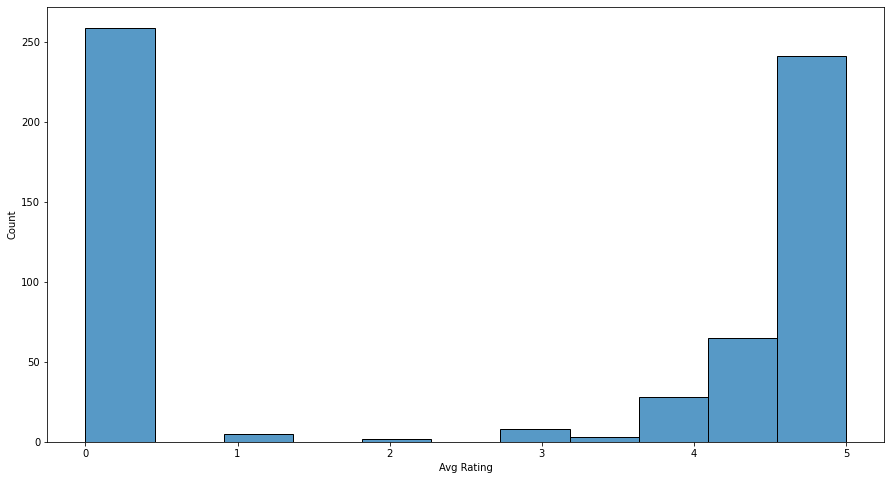

In [66]:
plt.figure(figsize=[15,8])
sns.histplot(df['Avg Rating']);

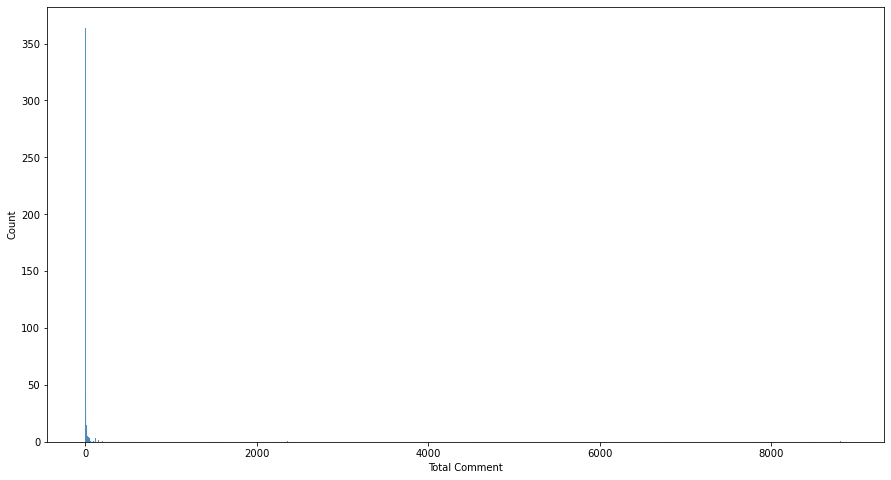

In [67]:
plt.figure(figsize=[15,8])
sns.histplot(df['Total Comment']);

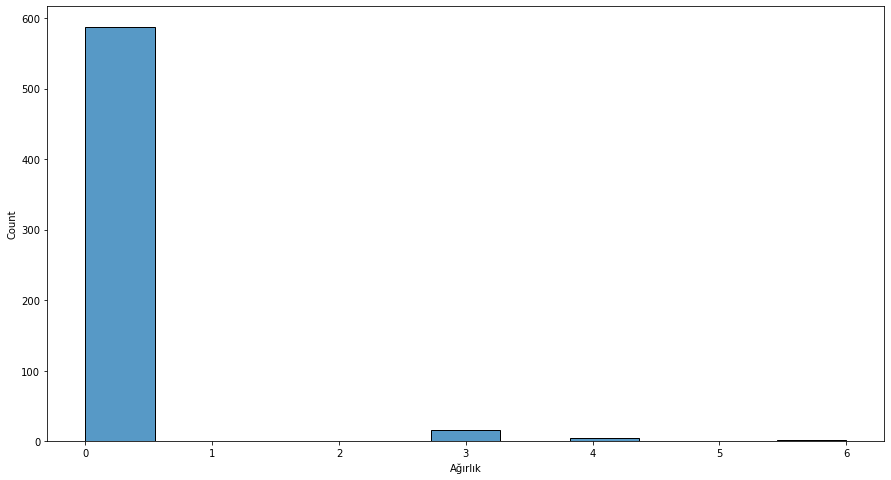

In [68]:
plt.figure(figsize=[15,8])
sns.histplot(df['Ağırlık']);

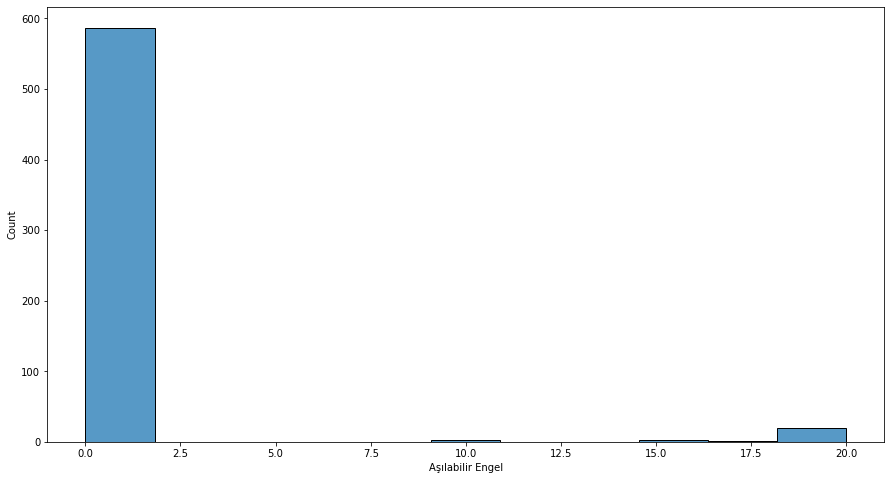

In [69]:
plt.figure(figsize=[15,8])
sns.histplot(df['Aşılabilir Engel']);

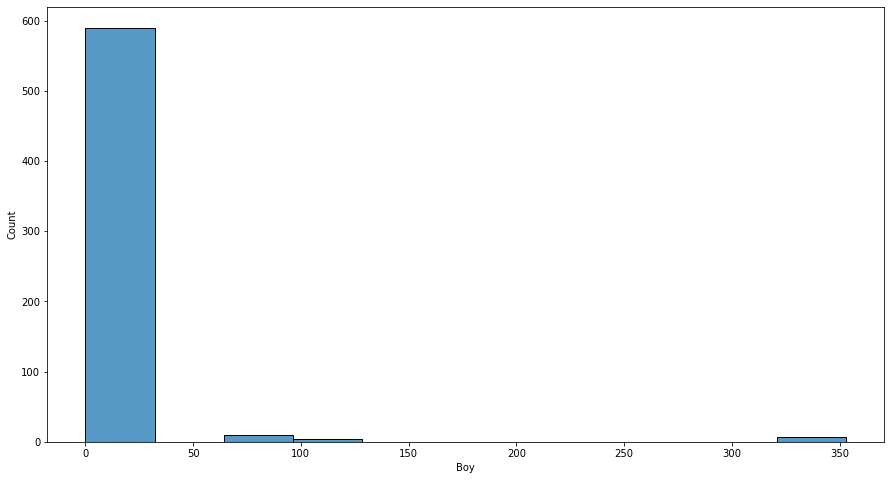

In [70]:
plt.figure(figsize=[15,8])
sns.histplot(df['Boy']);

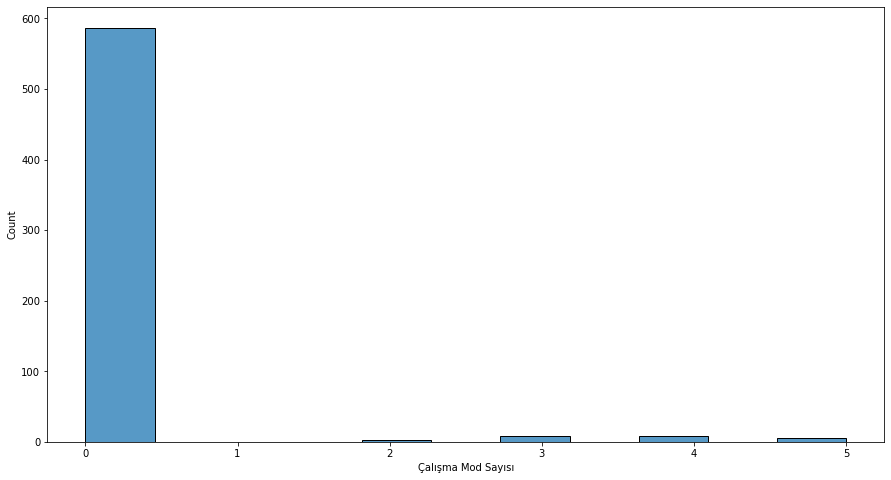

In [71]:
plt.figure(figsize=[15,8])
sns.histplot(df['Çalışma Mod Sayısı']);

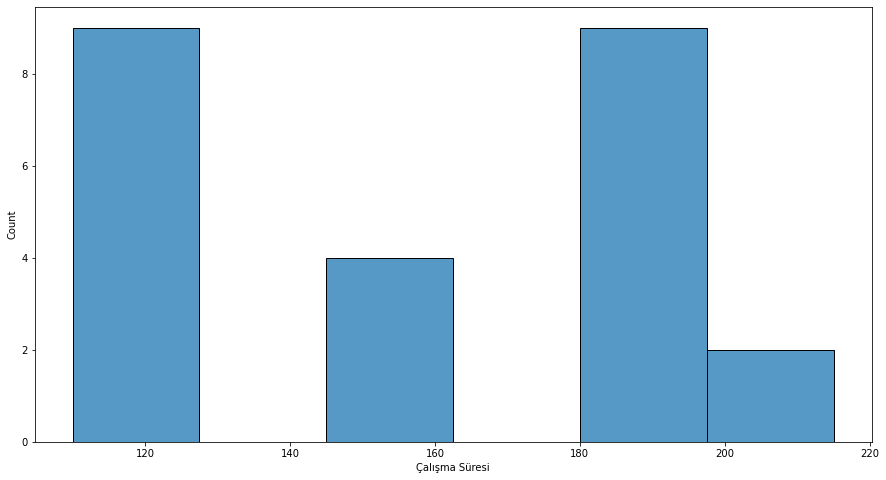

In [72]:
plt.figure(figsize=[15,8])
sns.histplot(df['Çalışma Süresi']);

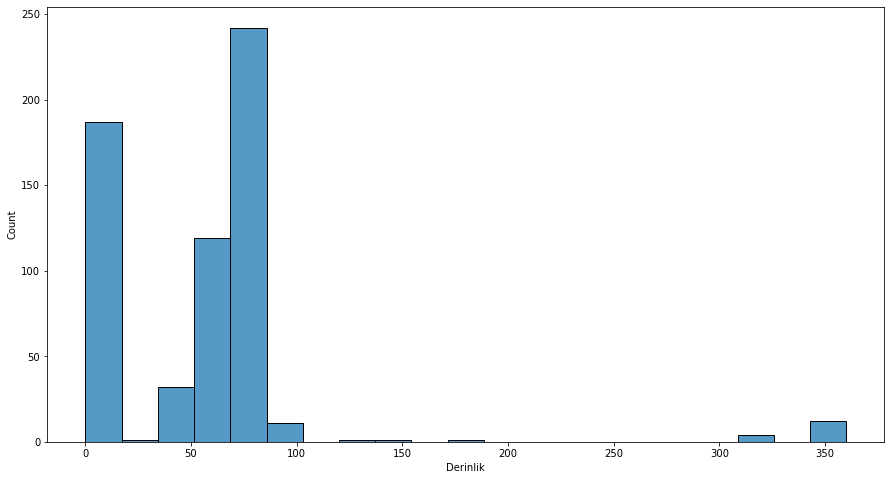

In [73]:
plt.figure(figsize=[15,8])
sns.histplot(df['Derinlik']);

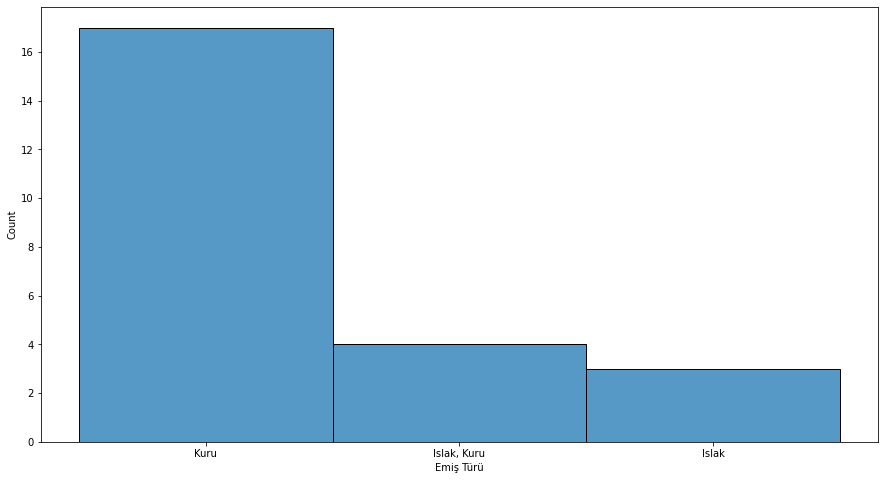

In [74]:
plt.figure(figsize=[15,8])
sns.histplot(df['Emiş Türü']);

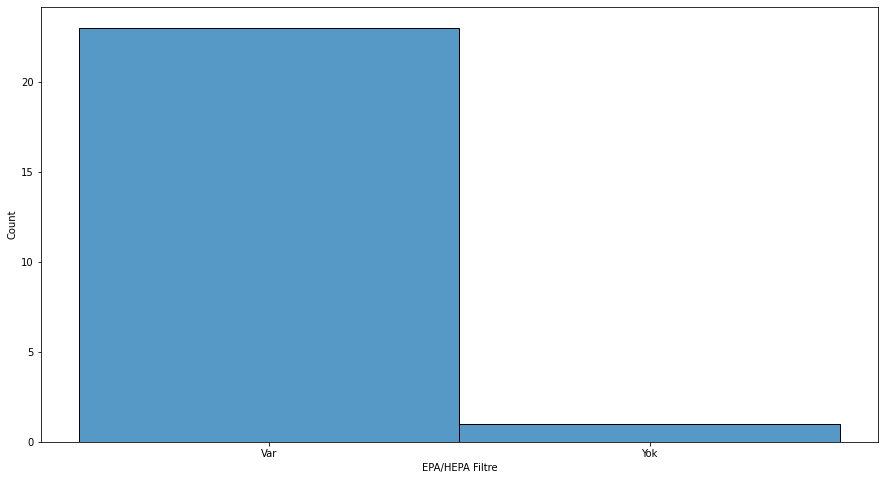

In [75]:
plt.figure(figsize=[15,8])
sns.histplot(df['EPA/HEPA Filtre']);

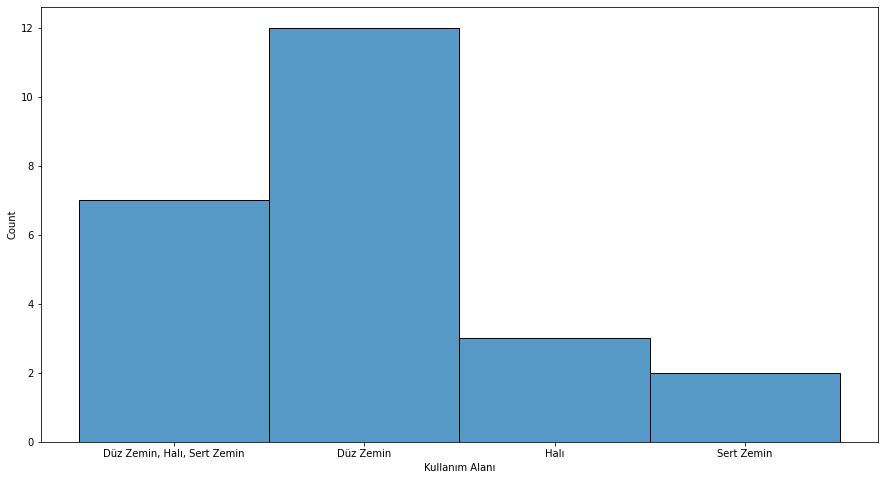

In [76]:
plt.figure(figsize=[15,8])
sns.histplot(df['Kullanım Alanı']);

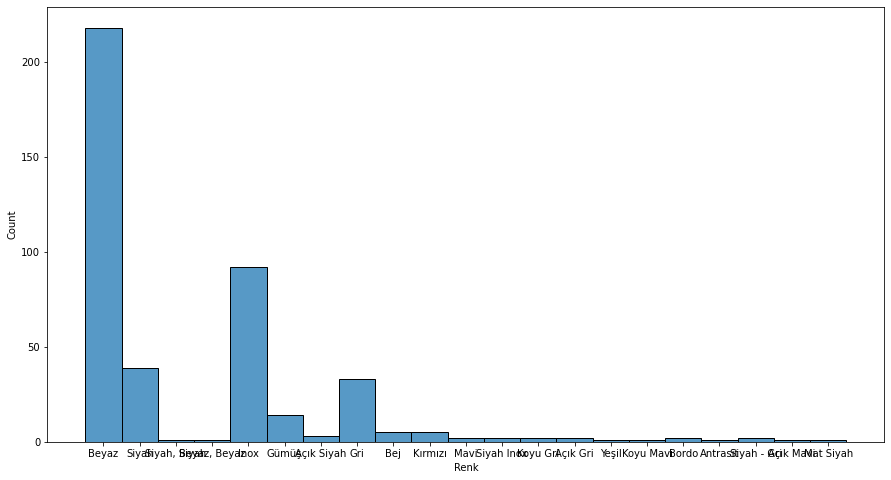

In [77]:
plt.figure(figsize=[15,8])
sns.histplot(df['Renk']);

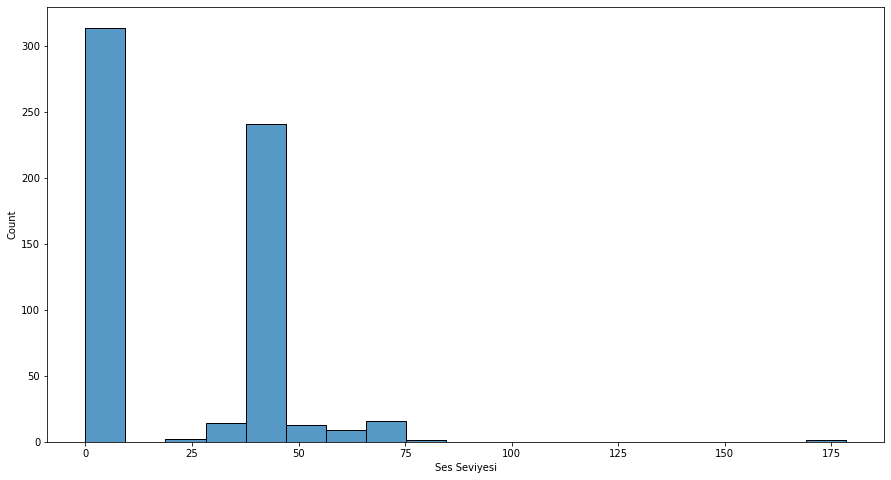

In [78]:
plt.figure(figsize=[15,8])
sns.histplot(df['Ses Seviyesi']);

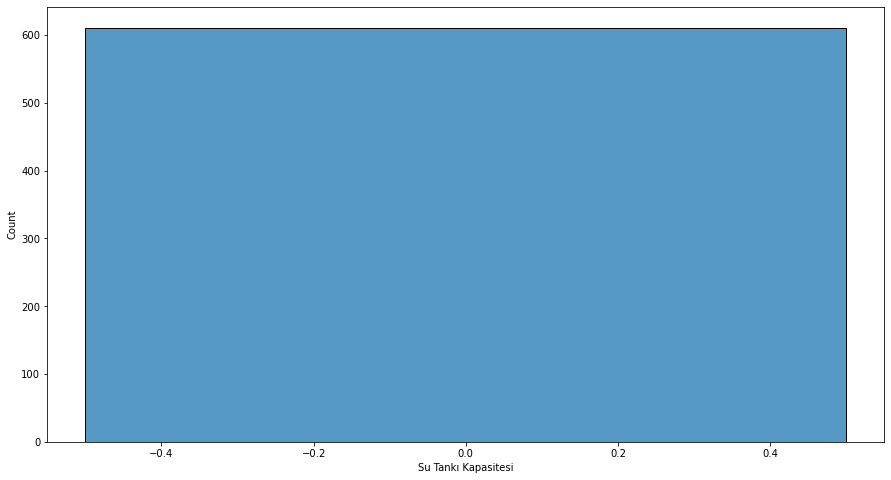

In [79]:
plt.figure(figsize=[15,8])
sns.histplot(df['Su Tankı Kapasitesi']);

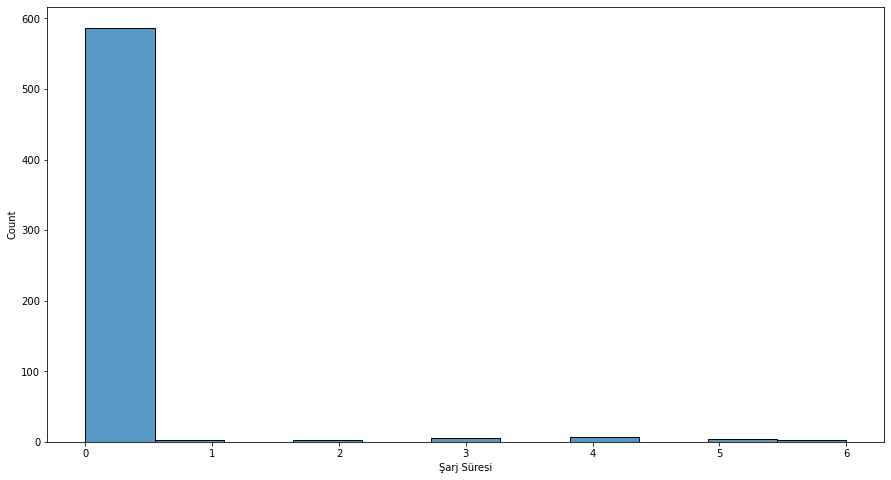

In [80]:
plt.figure(figsize=[15,8])
sns.histplot(df['Şarj Süresi']);

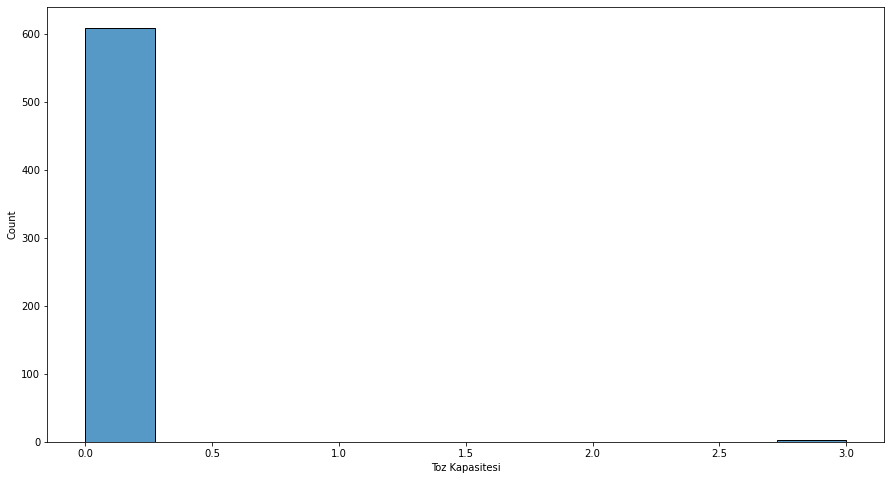

In [81]:
plt.figure(figsize=[15,8])
sns.histplot(df['Toz Kapasitesi']);

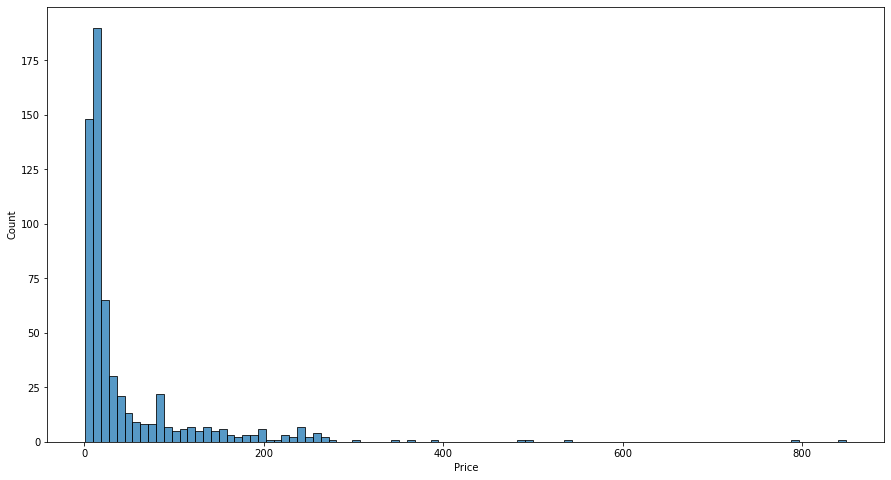

In [82]:
plt.figure(figsize=[15,8])
sns.histplot(df['Price']);

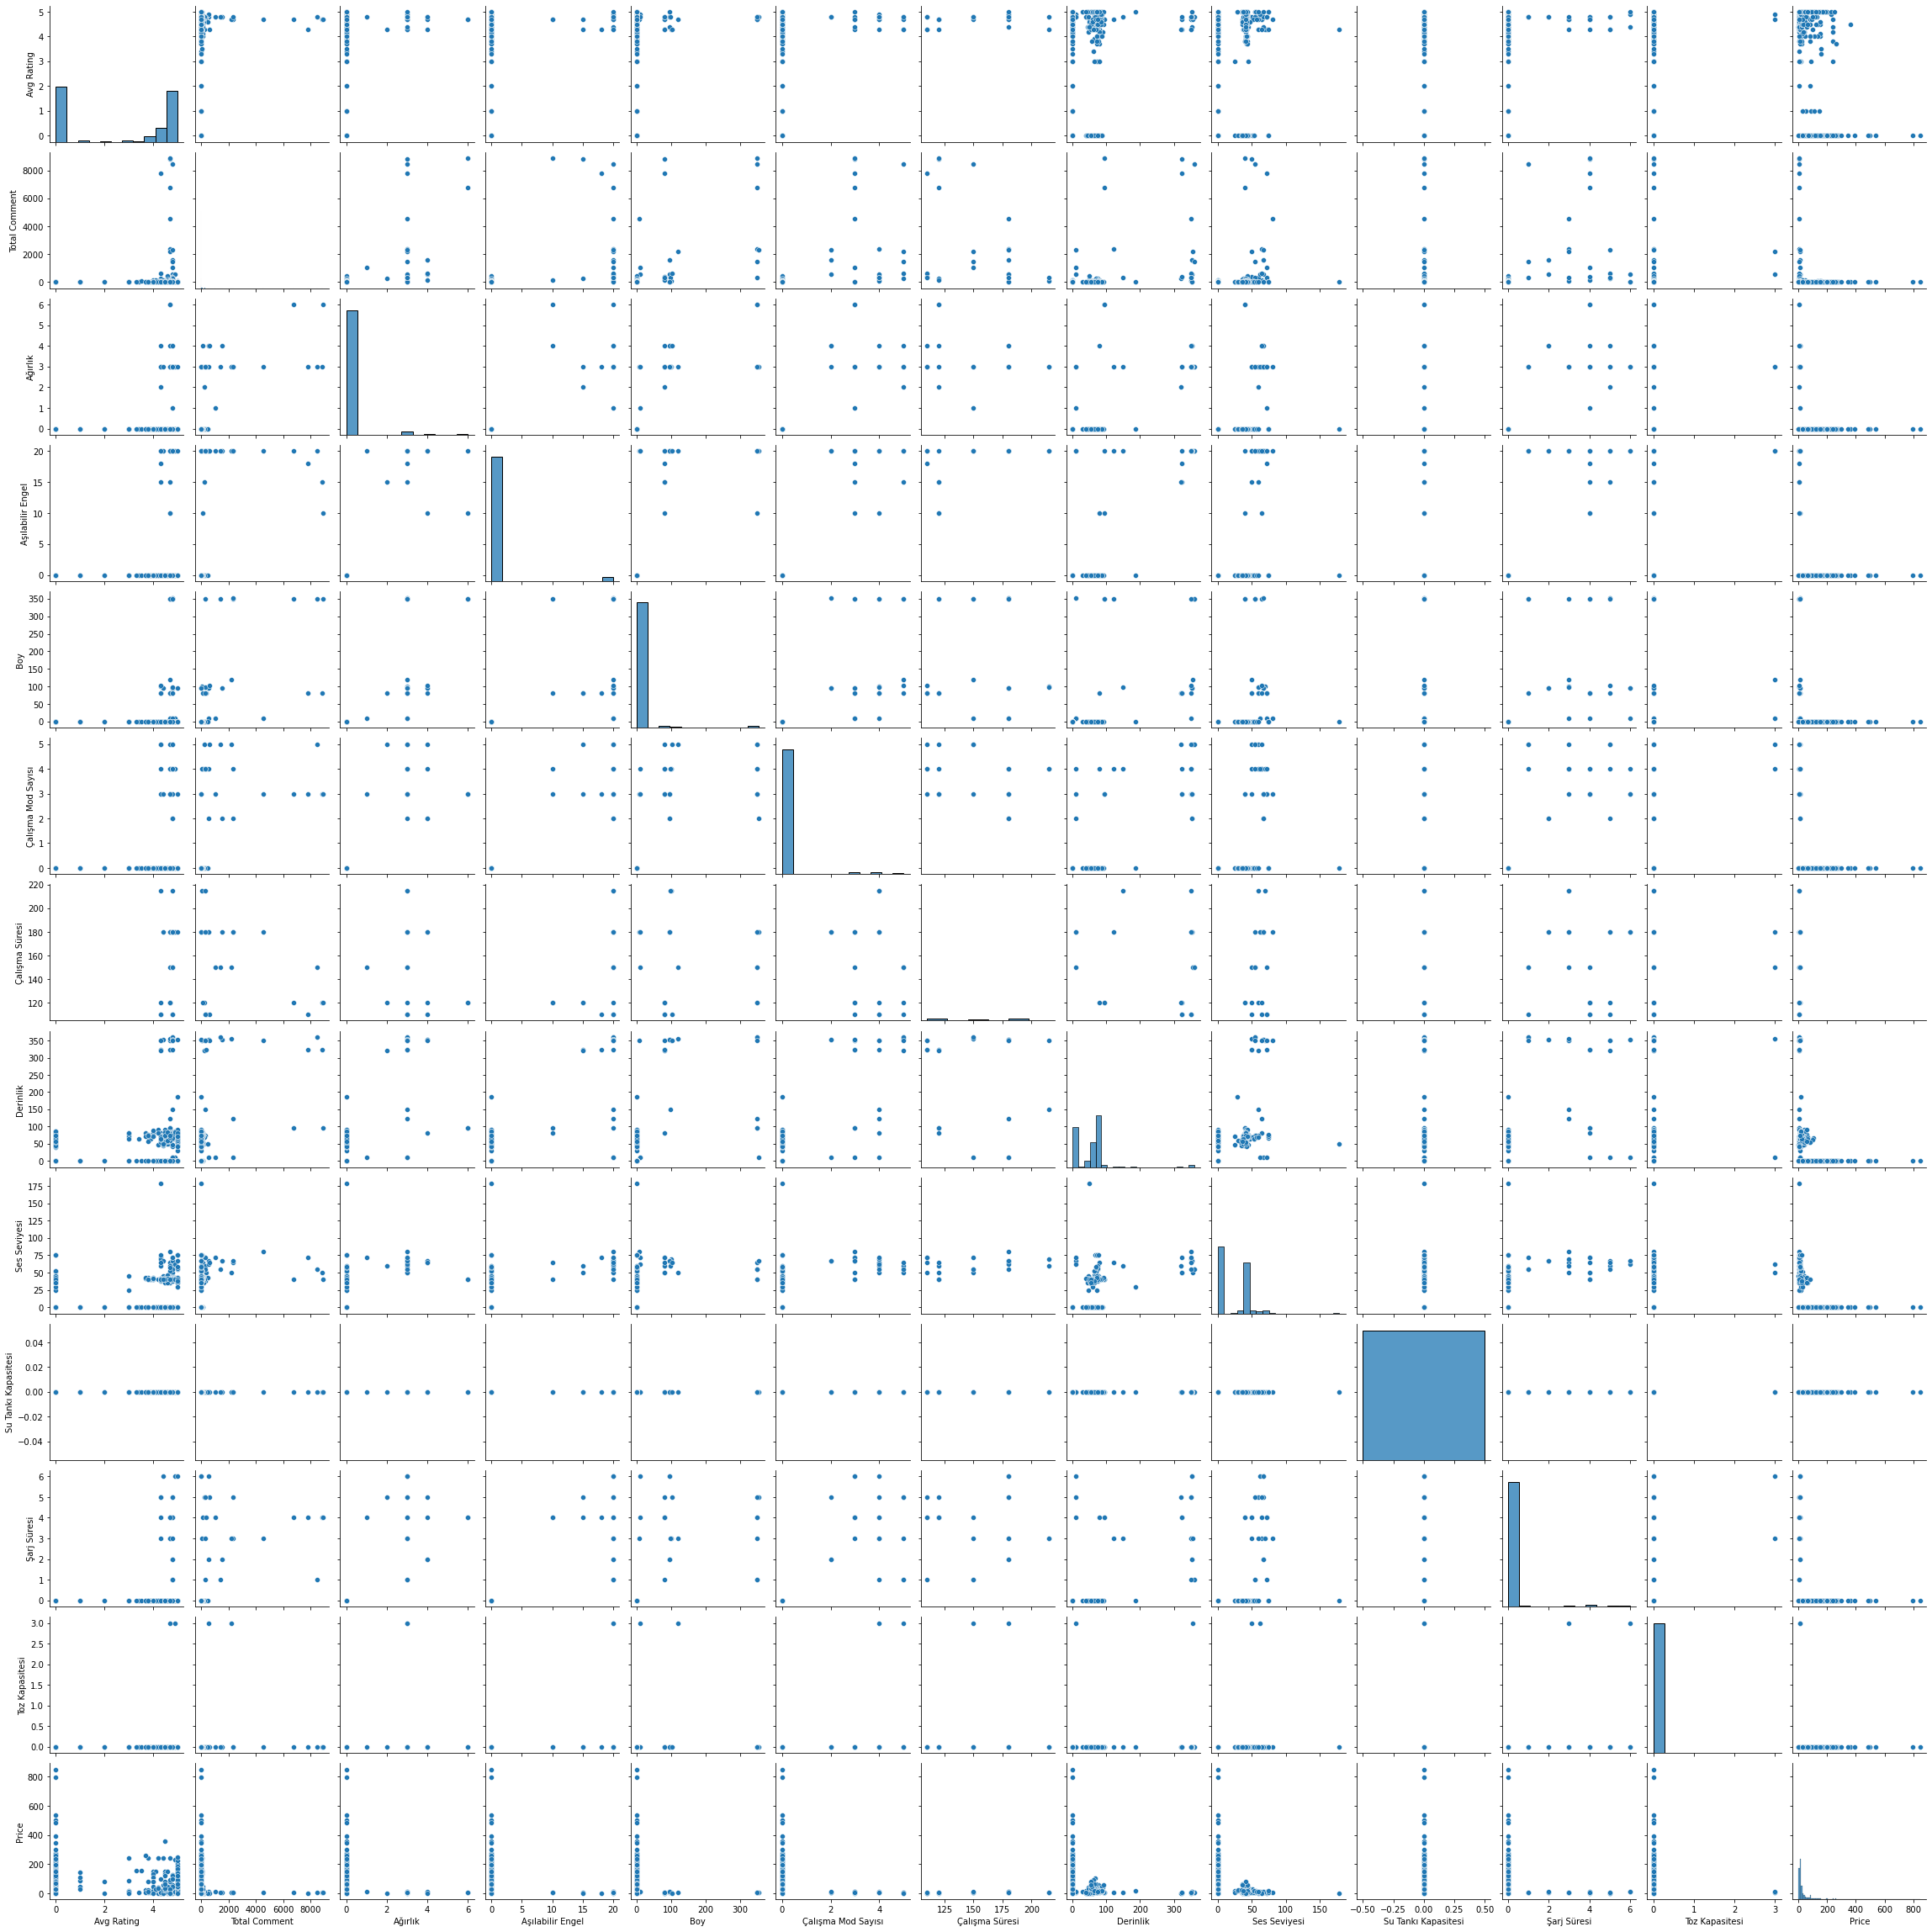

In [83]:
sns.pairplot(df);

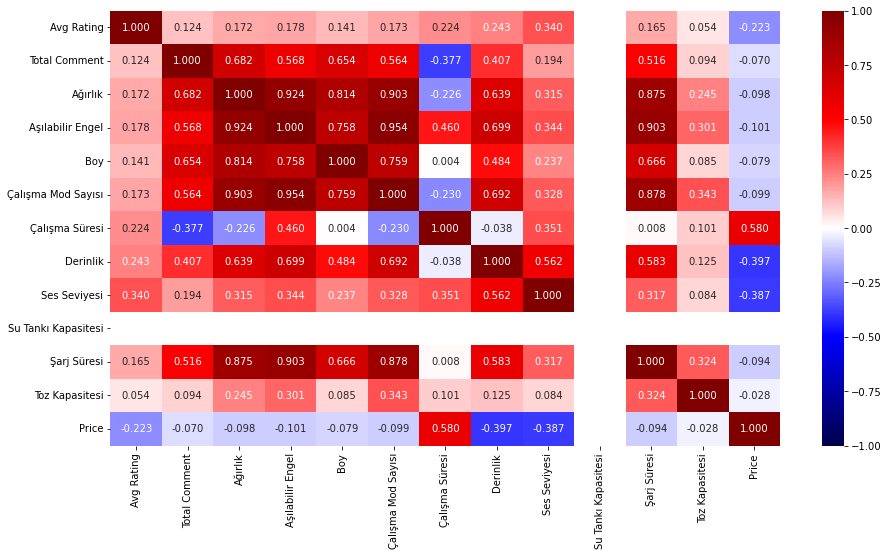

In [84]:
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.3f');